# Machine Learning Lab 2
## Exercise 1 - Exploratory Analysis on Real-World Data using Pandas and Matplotlib
Part A - Interesting Stats

In [1]:
## First we want to import the necessary packages as well as the data we will be working on
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## The following lets me see the output of all my code, not just the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

train = pd.read_csv('train.csv')
store = pd.read_csv('store.csv')

<ipython-input-1-4aed8e044443>:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


In [2]:
## Visualize the code a little
## We can look at the different variables present in the csv files
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
## Find the store that has the maximum sale recorded. Print the store id, date, and the sales on that day

## First I obtained the row index of the maximum sale recorded
maxsaleindex = np.flatnonzero(train.Sales == np.max(train.Sales))

## Then I used the row index from above in the loc function to return the info we were looking for
maxsaleinfo = train.loc[maxsaleindex, ['Store','Date','Sales']]
maxsaleinfo

,Store,Date,Sales
44393,909,2015-06-22,41551


In [7]:
## Find the store(s) that has/ve the least possible and maximum possible competition distance(s).

## We can implement the same method we used above for max sales
maxdistindex = np.flatnonzero(store.CompetitionDistance == np.max(store.CompetitionDistance))
maxdistindex = maxdistindex.tolist()
maxdistinfo = store.loc[maxdistindex, ['Store','CompetitionDistance']]
print("Stores with max. dist.:")
maxdistinfo

mindistindex = np.flatnonzero(store.CompetitionDistance == np.min(store.CompetitionDistance))
mindistindex = mindistindex.tolist()
mindistinfo = store.loc[mindistindex, ['Store','CompetitionDistance']]
print("Stores with min. dist.:")
mindistinfo

Stores with max. dist.:


,Store,CompetitionDistance
452,453,75860.0


Stores with min. dist.:


,Store,CompetitionDistance
515,516,20.0


In [10]:
## What is the maximum timeline a store has ran a "Promo" for?
## Which store was that, and what dates did the promotion cover?
temp=store.iloc[store["Promo2SinceWeek"].idxmax()] #(iii)
print(temp['Store'])
print(temp['PromoInterval'])

437
Jan,Apr,Jul,Oct


In [11]:
## What is the difference in the mean of sales (across all stores) when offering a Promo and not?

## To calculate the mean with and without promos I take the mean conditional on a variable
## The variable indicates whether or not the store had a promo on that day
nopromo = train.Promo == 0
mean_for_sales_nopromo = train.loc[nopromo, 'Sales'].mean()
mean_for_sales_nopromo = round(mean_for_sales_nopromo, 2)
print(f"The mean in sales when there is no promo is ${mean_for_sales_nopromo}.")

yespromo = train.Promo == 1
mean_for_sales_yespromo = train.loc[yespromo, 'Sales'].mean()
mean_for_sales_yespromo = round(mean_for_sales_yespromo, 2)
print(f"The mean in sales when there is a promo is ${mean_for_sales_yespromo}.")
print(f"In other words, the average is about ${round(mean_for_sales_yespromo - mean_for_sales_nopromo)} higher when there is a promo.")

The mean in sales when there is no promo is $4406.05.
The mean in sales when there is a promo is $7991.15.
In other words, the average is about $3585 higher when there is a promo.


In [14]:
## Are there any anomalies in the data where the store was "Open" but had no sales recorded? or vice versa?

## To check if there is an anomaly where the store was open but had no sales I look for the minimum sale for stores listed as open
## There is a minimum of 0 which means that such an anomaly does exist
store_open = train.Open == 1
min_for_store_open = train.loc[store_open, 'Sales'].min()
print(f"The minimum sales for open stores was ${min_for_store_open}")

## To find where and when this anomaly occurred we can simply find the row index and return the store ID and the date
zerosale_anomaly = np.flatnonzero(np.logical_and(train.Sales == 0, train.Open == 1))
zerosale_anomaly_stores = train.loc[zerosale_anomaly, ['Store','Date']]
zerosale_anomaly_stores

## To see if there is an anomaly where a store recorded sales when it was closed, I look for the maximum sale for stores listed as closed
## The maximum is 0 so there is no anomaly in this case
store_closed = train.Open == 0
max_for_store_closed = train.loc[store_closed, 'Sales'].max()
print(f"The maximum sales for closed stores was ${min_for_store_open}")

The minimum sales for open stores was $0


,Store,Date
86825,971,2015-05-15
142278,674,2015-03-26
196938,699,2015-02-05
322053,708,2014-10-01
330176,357,2014-09-22
340348,227,2014-09-11
340860,835,2014-09-11
341795,835,2014-09-10
346232,548,2014-09-05
346734,28,2014-09-04


The maximum sales for closed stores was $0


In [15]:
## Which store type (’a’,’b’ etc.) has had the most sales?

## First we have to merge the 2 dataframes based on the store ID
merged_df = pd.merge(train,store, on='Store')
## Then we can create a dataframe that groups the data by the store type
storetype_df = merged_df.groupby('StoreType')
## Using the store type dataframe, we can create a dataframe of the means of sales for each store type
## This shows us that store type A has the most sales
sumsales_df = storetype_df['Sales'].sum()
sumsales_df = sumsales_df.reset_index()
sumsales_df = sumsales_df.sort_values('Sales', ascending=False)
sumsales_df

,StoreType,Sales
0,a,3165334859
3,d,1765392943
2,c,783221426
1,b,159231395


## Exercise 1 - Exploratory Analysis on Real-World Data using Pandas and Matplotlib
Part B - Plotting

(5265.395529153085, 7167.9419457120375)

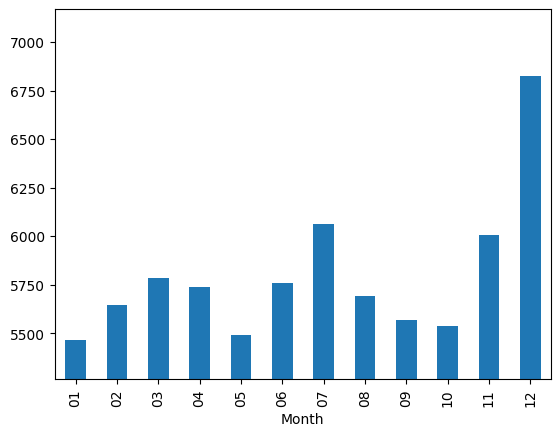

In [24]:
## On a monthly basis how do the mean of sales vary (across all stores)? Plot these.

## The bar plot shows us that the mean of sales is pretty steady throughout the year with a large spike in December
train[["Day", "Month", "Year"]] = train["Date"].str.split("-", expand = True)
month_df = train.groupby('Month')
monthsales_df = month_df['Sales'].mean()
monthsales_df = monthsales_df.reset_index()
ax = monthsales_df.plot(x='Month', y='Sales', kind='bar', legend=False)
## Set the starting point of the y-axis to a higher value
min = monthsales_df['Sales'].min()
ax.set_ylim(bottom=min-200)
## Display the plot
plt.show()

<Axes: xlabel='DayOfWeek'>

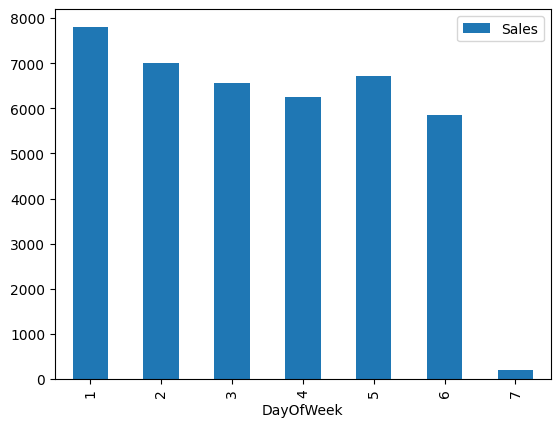

In [25]:
## On a daily basis how do the mean of sales vary (across all stores)? Plot these.

## Monday has the highest mean and Sunday is very very low because most Rossman stores are closed on this day
daily_df = train.groupby("DayOfWeek")
dailysales_df = daily_df['Sales'].mean()
dailysales_df = dailysales_df.reset_index()
dailysales_df.plot(x='DayOfWeek', y='Sales', kind='bar')

<Axes: xlabel='DayOfYear'>

Text(0.5, 1.0, 'Store 1 Cumulative Sales')

Text(0.5, 0, 'Day # in First Year Opened')

Text(0, 0.5, 'Cumulative Sales')

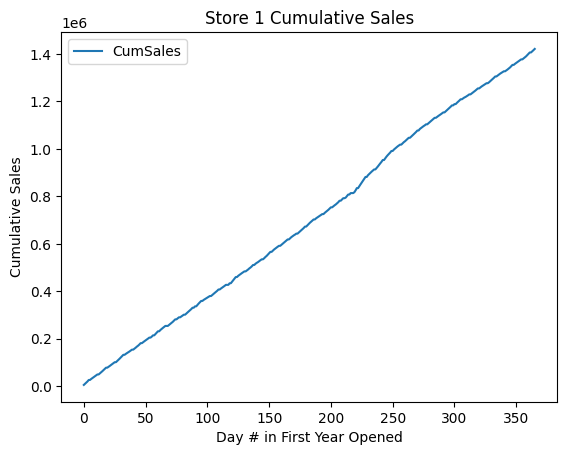

In [26]:
## For the first store id, plot its cumulative sales for the first year

store1index = np.flatnonzero(train.Store == 1)
store1index = store1index.tolist()
store1info = train.loc[store1index, ['Sales']]
store1info = store1info[0:366]
store1info.insert(loc= 1, column='DayOfYear',value=list(range(0,366)))
store1info['CumSales'] = store1info['Sales'].cumsum()
store1info.plot(x='DayOfYear', y='CumSales',kind='line')
plt.title('Store 1 Cumulative Sales')
plt.xlabel('Day # in First Year Opened')
plt.ylabel('Cumulative Sales')

Text(0.5, 0, '# of Customers')

Text(0, 0.5, 'Sales')

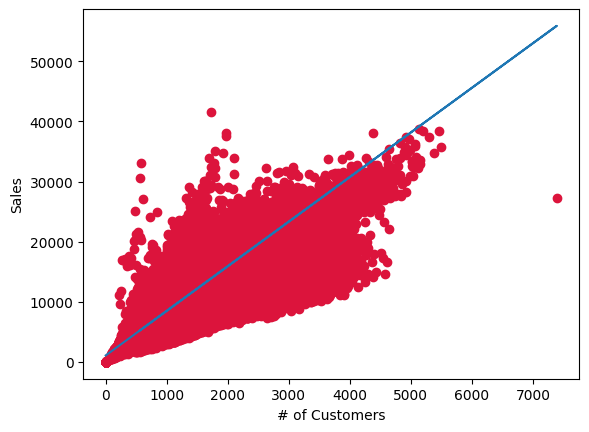

In [27]:
## Plot and comment on the following relationships: customers(x-axis) vs. sales(y-axis)

## this scatter plot shows a clear positive relationship between # of customers and sales
## the more customers the higher the sales tend to be
Customers = train['Customers']
Sales = train['Sales']
plt.scatter(Customers, Sales, c='Crimson')
m, b = np.polyfit(Customers, Sales, 1)
plt.plot(Customers, m*Customers + b)
plt.xlabel('# of Customers')
plt.ylabel('Sales')

Text(0.5, 0, 'Competition Distance')

Text(0, 0.5, 'Sales')

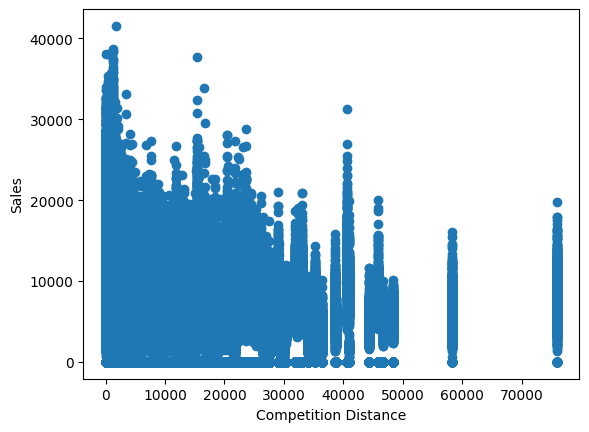

In [28]:
## Plot and comment on the following relationships: competitiondistance(x-axis) vs. sales(y-axis)

## the relationship in this graph is less clear but this coincides with concepts in economics
## conventional distance decay curves vary by region and population
## therefore stores that are close but are in an unpopulated area have low sales
CompDist = merged_df['CompetitionDistance']
mSales = merged_df['Sales']
plt.scatter(CompDist, mSales)
plt.xlabel('Competition Distance')
plt.ylabel('Sales')

In [29]:
## Plot an array of Pearson correlations between all features.
## Remember to do the merge operation between the dataframes store and train.

merged_df.corr().style.background_gradient(cmap="Blues")

<ipython-input-29-8645d5bd2abb>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr().style.background_gradient(cmap="Blues")


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695
CompetitionOpenSinceMonth,-0.050746,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326
CompetitionOpenSinceYear,-0.004592,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155


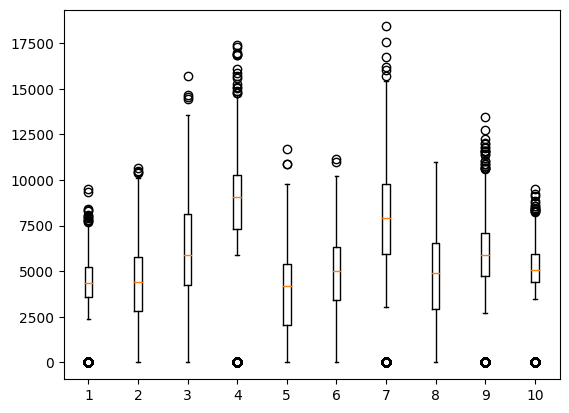

In [35]:
## For the first 10 stores (id’ed) draw boxplots of their sales
## Which store has the highest median sales?

## based on the boxplots, store 4 has the highest median sales
for i in range(1,11):
  storeindex = np.flatnonzero(train.Store == i)
  storeindex = storeindex.tolist()
  storeinfo = train.loc[storeindex, ['Sales']]
  plt.boxplot(storeinfo, positions=[i])
plt.show();

## Exercise 2 - Linear Regression
Part A: Implementing Gaussian Elimination

In [2]:
## Generate a matrix X with dimensions 100×10. Initialize it with normal distribution µ = 2 and  = 0.01

## Since we are denoting 0 as the parameter for the bias/intecept, make the first column of X all ones
X = np.random.normal(2,0.01,(100,10))
ones = np.ones((100,1))
X = np.append(ones, X, axis = 1)

## Generate a simple target matrix Y with dimensions 100 × 1. Initialize it with random uniform distribution.
Y = np.random.uniform(0,1,(100,1))

In [3]:
## Implement linear regression algorithm and train it using matrix X to learn values of 0:10.
## Implement the algorithm given in Fig.1 to solve system of linear equations

def gauss_method(a,b):
  ## Define matrix size
  n = len(b)
  ## GAUSSIAN ELIMINATION
  ## Matrix rows
  for k in range(0,n-1):
    for i in range(k+1,n):
      ## Make sure value isn't 0
      if a[i,k] != 0.0:
        f = a[i,k]/a[k,k]
        ## Make the lower triangular matrix 0
        a[i,k+1:n] = a[i,k+1:n] - (f*a[k,k+1:n])
        ## Update values
        b[i] = b[i] - (f*b[k])
  ## BACKWARD SOLVE
  ## Similar to above but diagonal
  for k in range(n-1,-1,-1):
    b[k] = (b[k] - (a[k,k+1:n]@b[k+1:n]))/a[k,k]
  return b

## Calculating beta value using the inverse function
beta=gauss_method(X.T.dot(X),X.T.dot(Y))
beta

array([[-10.1341376 ],
       [  2.63428305],
       [  1.53150857],
       [  0.01832551],
       [ -0.13120095],
       [ -1.15976358],
       [ -2.31896287],
       [  2.1403813 ],
       [ -1.14063625],
       [ -0.37336314],
       [  4.09926553]])

In [5]:
## Implement the corresponding pred. algorithm and calculate the points for each training example in matrix X
Y_predicted = np.matmul(X,beta)

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

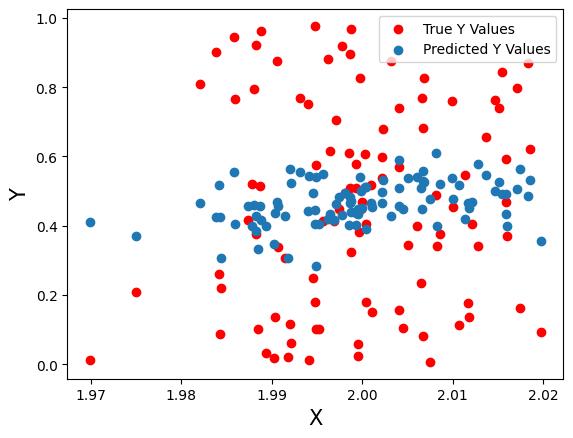

In [11]:
## Plot the training points from matrix Y and predicted values in the form of scatter graph

plt.scatter(X[:,1:2],Y, c='red', label='True Y Values')
plt.scatter(X[:,1:2],Y_predicted, label='Predicted Y Values')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend()

array([[-10.1341376 ],
       [  2.63428305],
       [  1.53150857],
       [  0.01832551],
       [ -0.13120095],
       [ -1.15976358],
       [ -2.31896287],
       [  2.1403813 ],
       [ -1.14063625],
       [ -0.37336314],
       [  4.09926553]])

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

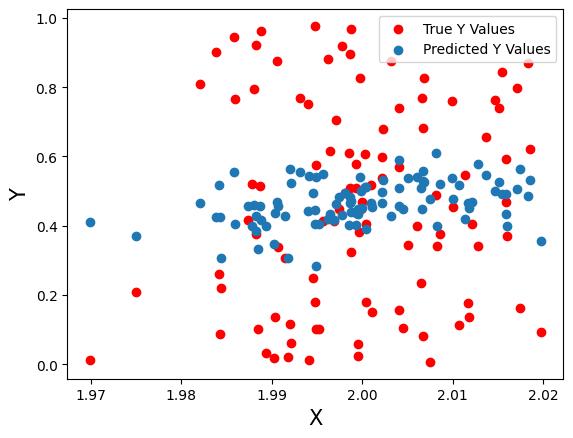

In [14]:
## In the end use numpy.linalg.lstsq to learn 0:10 and plot the predictions from these parameters

## Should get the exact same graph and we do
check = np.linalg.lstsq(X,Y, rcond = None)[0]
check
newY_predicted = np.matmul(X,check)
plt.scatter(X[:,1:2],Y, c='red', label='True Y Values')
plt.scatter(X[:,1:2],newY_predicted, label='Predicted Y Values')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend()

## Exercise 2 - Linear Regression
Part B: Multiple Linear (Auto) Regression

In [16]:
## Find all the stores that have sales recorded for 942 days
## Create a data matrix of the shape (#_of_stores, 942) for the daily sales record of these stores

## We can sort the data according to store ID so that we can pivot the dataframe based on this value
matrix942 = train.sort_values(by=['Store'])
matrix942 = matrix942.pivot(index='Store',columns='Date',values='Sales')
## Getting rid of any rows with missing values ensures that only stores with 942 days of data remain
matrix942 = matrix942.dropna()
matrix942.head()

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31
Store,,,,,,,,,,,,,,,,,,,,,
1,0.0,5530.0,4327.0,4486.0,4997.0,0.0,7176.0,5580.0,5471.0,4892.0,...,3464.0,3769.0,3706.0,4364.0,0.0,6102.0,5011.0,4782.0,5020.0,5263.0
2,0.0,4422.0,4159.0,4484.0,2342.0,0.0,6775.0,6318.0,6763.0,5618.0,...,5093.0,4108.0,3854.0,2512.0,0.0,6627.0,5671.0,6402.0,5567.0,6064.0
3,0.0,6823.0,5902.0,6069.0,4523.0,0.0,12247.0,9800.0,8001.0,7772.0,...,5414.0,5702.0,5080.0,3878.0,0.0,8107.0,8864.0,7610.0,8977.0,8314.0
4,0.0,9941.0,8247.0,8290.0,10338.0,0.0,12112.0,10031.0,8857.0,9472.0,...,8503.0,7286.0,8322.0,9322.0,0.0,11812.0,10275.0,10514.0,10387.0,13995.0
5,0.0,4253.0,3465.0,4456.0,1590.0,0.0,6978.0,5718.0,5974.0,4999.0,...,3595.0,3713.0,3815.0,2030.0,0.0,7059.0,6083.0,5899.0,4943.0,4822.0


In [20]:
## Use the first 800 stores in this data matrix for training and the rest for testing
## Split the sales data into 2 parts:
## the 1st part contains the information about the first 900 days of sales
## and the 2nd contains the information about the last 42 days of sales
## Print the shapes of these 4 data matrices. You should have shapes corresponding to dimensions of (#StoreIds, #NumDays).

Xtrain = matrix942.iloc[:800, :900]
Xtest = matrix942.iloc[800:, :900]
Ytrain = matrix942.iloc[:800, 900:]
Ytest = matrix942.iloc[800:, 900:]
print(f"X_train shape is {Xtrain.shape}")
print(f"X_test shape is {Xtest.shape}")
print(f"Y_train shape is {Ytrain.shape}")
print(f"Y_test shape is {Ytest.shape}")

X_train shape is (800, 900)
X_test shape is (134, 900)
Y_train shape is (800, 42)
Y_test shape is (134, 42)


In [30]:
## Iteratively build multiple linear regression models for column vectors of Ytrain.
## You are allowed to use the numpy routines for calculating inverses, transposing of matrices and matrix multiplication.

## Initialize an empty matrix to store beta coefficients for each model
beta_matrix = np.zeros((Xtrain.shape[1], Ytrain.shape[1]))

for i, col in enumerate(Ytrain.columns):
  I = Ytrain[col]
  beta_matrix[:, i] = np.linalg.inv(Xtrain.transpose().dot(Xtrain)).dot(Xtrain.transpose()).dot(I)

In [31]:
## Use the 0:900 for each of the 42 models to make predictions for each day ahead
## In total 42 days

Y_predicted = np.dot(Xtest,beta_matrix)

In [34]:
## Calculate and print the daily RMSE and MAE for all 42 sales values using test split (as input)
## Also calculate and print overall average RMSE and MAE. (i.e. just the mean RMSE of all 42 models)

## Initialize arrays to store RMSE and MAE for each model
rmse_values = np.zeros(Ytest.shape[1])
mae_values = np.zeros(Ytest.shape[1])

## Calculate RMSE and MAE for each of the 42 models
for i in range(Ytest.shape[1]):
    mse = np.square(np.subtract(Ytest.iloc[:, i], Y_predicted[:, i])).mean()
    rmse_values[i] = np.sqrt(mse)
    mae_values[i] = np.abs(np.subtract(Ytest.iloc[:, i], Y_predicted[:, i])).mean()
    #print(f"Day {i+1} - RMSE: {rmse_values[i]}, MAE: {mae_values[i]}")

## Calculate overall average RMSE and MAE
average_rmse = np.mean(rmse_values)
average_mae = np.mean(mae_values)
print(f"Overall Average RMSE: {average_rmse}")
print(f"Overall Average MAE: {average_mae}")


Overall Average RMSE: 46521513.30092687
Overall Average MAE: 7234630.293315588


In [ ]:
## Reason why or why not Linear Regression is a good choice for this task
'''
Because there are so many different beta values being used in the model, linear regression is not optimal.
With this many beta values, the regression model will overfit itself to the data.
This results in poor prediction capabilities.
'''